In [1]:
"""                             iSIM_MODULES
    ----------------------------------------------------------------------
    
    Miranda-Quintana Group, Department of Chemistry, University of Florida 
    
    ----------------------------------------------------------------------
    
    Please, cite the original paper on iSIM:

    ----------------------------------------------------------------------

    This file contains an example of generation of fingerprints and comparison
    of molecules using the iSIM method.

    """

'                             iSIM_MODULES\n    ----------------------------------------------------------------------\n    \n    Miranda-Quintana Group, Department of Chemistry, University of Florida \n    \n    ----------------------------------------------------------------------\n    \n    Please, cite the original paper on iSIM:\n\n    ----------------------------------------------------------------------\n\n    This file contains an example of generation of fingerprints and comparison\n    of molecules using the iSIM method.\n\n    '

In [2]:
from isim_comp import *
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw

In [3]:
# Generation of binary fingerprints from a SMILES
# This is step is only necesary if you do not have your data as fingerprints

# Read the SMILES from a csv file
df = pd.read_csv('iSIM_example.csv') # --> This file contains the SMILES of the molecules, change it for your own data
smiles = df['SMILES'].tolist() # --> This is a list of SMILES, change column name for your own data

# Generation of RDKit fingerprints
fps = []
for smi in smiles:
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = np.array([])
        DataStructs.cDataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(mol), fp)
        fps.append(fp)
        
    except:
        print('Invalid SMILES: ', smi)

fps = np.array(fps)

# Optional: save the fingerprints in a npy file
# np.save('fps_iSIM_example.npy', fps)    

In [4]:
# Load the fingerprints from a npy file (optional, in case you have already generated the fingerprints)
# fps = np.load('fps_iSIM_example.npy', allow_pickle=True)

In [5]:
# Calculate iSIM value for a desired index
index = 'JT' # --> Change JT, RR or SM
print('Number of molecules: ', len(fps))
print('isim: ', np.round(calculate_isim(fps, n_ary = index), 5))

Number of molecules:  14041
isim:  0.14821


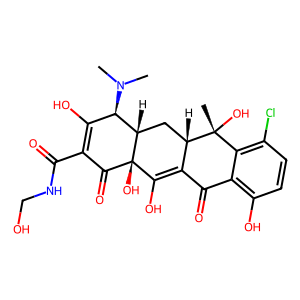

In [6]:
# Get the medoid (most similar molecule to the rest of the molecules), drawing work if smiles are available
medoid = calculate_medoid(fps, n_ary = index)
mol = Chem.MolFromSmiles(smiles[medoid])
Draw.MolToImage(mol)

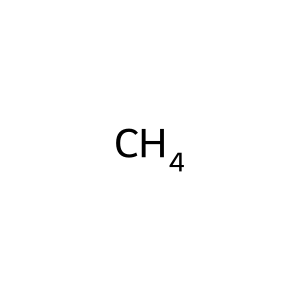

In [7]:
# Get the outliers (most dissimilar molecules to the rest of the molecules), drawing work if smiles are available
outlier = calculate_outlier(fps, n_ary = index)
mol = Chem.MolFromSmiles(smiles[outlier])
Draw.MolToImage(mol)